In [3]:
import pandas as pd

In [4]:
X=pd.read_csv(r"D:\Downloads\soil.csv")

In [5]:
X.head()

,A(410),B(435),C(460),D(485),E(510),F(535),G(560),H(585),R(610),I(645),S(680),J(705),U(760),V(810),W(860),K(900),L(940),T(730)
0,1945.57,992.41,2051.13,707.77,822.51,1371.58,318.71,315.85,1305.33,159.24,329.50,49.90,75.75,237.65,305.23,60.10,36.52,83.32
1,2336.77,816.05,2008.33,693.91,848.56,1691.27,373.00,375.11,1339.28,188.68,308.97,62.27,69.30,242.82,277.02,82.78,44.74,77.27
2,1625.50,1070.13,2472.09,810.33,960.65,1745.17,428.89,436.37,1206.99,226.15,292.57,63.53,68.50,211.82,273.69,88.45,47.47,75.75
3,2557.95,1594.40,2790.56,1008.17,1128.00,1570.73,488.55,499.64,1339.11,261.84,357.22,77.09,77.36,229.90,315.37,98.09,54.78,84.07
4,3262.28,1300.30,2948.80,949.85,1114.58,2049.14,501.99,513.20,1482.11,268.53,338.74,77.09,75.75,260.90,307.48,108.30,55.69,86.69


In [6]:
y=pd.read_csv(r"D:\Downloads\soil_target.csv")
y.head()

,pH,EC (dS/m),OC (%),P (kg/ha),K (kg/ha),Ca (meq/100g),Mg (meq/100g),S (ppm),Fe (ppm),Mn (ppm),Cu (ppm),Zn (ppm),B (ppm)
0,6.72,0.09,1.05,26.10,444.00,6.14,2.32,11.21,3.08,14.10,2.23,0.84,1.22
1,6.04,0.17,0.33,81.99,372.00,5.98,0.50,12.93,47.74,37.63,3.28,6.79,1.13
2,5.35,0.07,0.87,80.59,132.00,3.15,2.49,5.17,14.96,44.53,1.22,1.21,0.98
3,6.38,0.03,0.48,33.81,221.76,3.40,1.90,11.59,6.38,10.62,1.77,0.99,0.27
4,8.58,0.04,0.69,38.19,234.08,6.60,5.20,34.10,14.08,3.56,1.56,0.40,0.77


In [7]:
data=pd.concat([X,y],axis=1)

In [8]:
data.head()

,A(410),B(435),C(460),D(485),E(510),F(535),G(560),H(585),R(610),I(645),...,P (kg/ha),K (kg/ha),Ca (meq/100g),Mg (meq/100g),S (ppm),Fe (ppm),Mn (ppm),Cu (ppm),Zn (ppm),B (ppm)
0,1945.57,992.41,2051.13,707.77,822.51,1371.58,318.71,315.85,1305.33,159.24,...,26.10,444.00,6.14,2.32,11.21,3.08,14.10,2.23,0.84,1.22
1,2336.77,816.05,2008.33,693.91,848.56,1691.27,373.00,375.11,1339.28,188.68,...,81.99,372.00,5.98,0.50,12.93,47.74,37.63,3.28,6.79,1.13
2,1625.50,1070.13,2472.09,810.33,960.65,1745.17,428.89,436.37,1206.99,226.15,...,80.59,132.00,3.15,2.49,5.17,14.96,44.53,1.22,1.21,0.98
3,2557.95,1594.40,2790.56,1008.17,1128.00,1570.73,488.55,499.64,1339.11,261.84,...,33.81,221.76,3.40,1.90,11.59,6.38,10.62,1.77,0.99,0.27
4,3262.28,1300.30,2948.80,949.85,1114.58,2049.14,501.99,513.20,1482.11,268.53,...,38.19,234.08,6.60,5.20,34.10,14.08,3.56,1.56,0.40,0.77


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [10]:
# Impute missing values in features and target
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y)


In [11]:
# Check if there are any NaN values left in the imputed arrays
import numpy as np
print("Any missing values in X_imputed?", np.any(np.isnan(X_imputed)))
print("Any missing values in y_imputed?", np.any(np.isnan(y_imputed)))

Any missing values in X_imputed? False
Any missing values in y_imputed? False


In [12]:

# Preprocess the data
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X_imputed)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler (for normalization)
scaler_norm = MinMaxScaler()

# Fit and transform the scaled data
X_scaled_norm = scaler_norm.fit_transform(X_scaled)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

In [15]:
# Model training for DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
def feature_importance_analysis(model, X, feature_names):
    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = np.abs(model.coef_)
    else:
        raise AttributeError("Model does not support feature importance analysis.")

    # Create DataFrame
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display importance values
    print(importance_df)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()


DecisionTreeRegressor Feature Importance:
   Feature  Importance
5   F(535)    0.231080
6   G(560)    0.141018
10  S(680)    0.101948
14  W(860)    0.095107
15  K(900)    0.088898
0   A(410)    0.070594
12  U(760)    0.057075
1   B(435)    0.055171
16  L(940)    0.045565
13  V(810)    0.029468
9   I(645)    0.026461
3   D(485)    0.020721
2   C(460)    0.016255
8   R(610)    0.016128
4   E(510)    0.001295
7   H(585)    0.001118
17  T(730)    0.001058
11  J(705)    0.001040


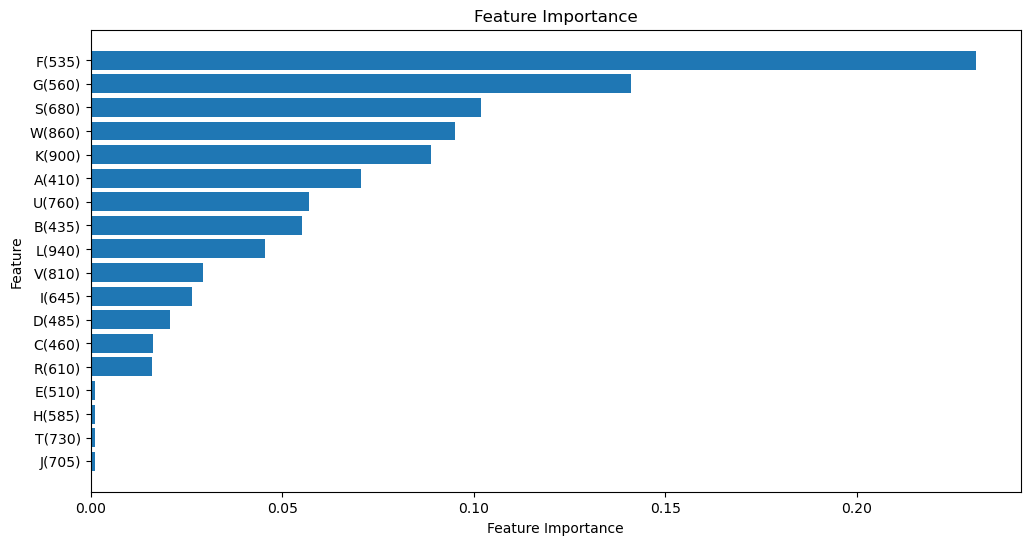

In [17]:
# Apply feature importance analysis for DecisionTreeRegressor
print("\nDecisionTreeRegressor Feature Importance:")
feature_importance_analysis(dt, X, X.columns)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse=np.sqrt(train_mse)
    
    # Print the metrics
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R2) Score: {train_r2}")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")
    print(f"R-squared (R2) Score on test data: {test_r2}")

print("\nDecision Tree Model Evaluation:")
evaluate_model(dt, X_train, X_test, y_train, y_test)



Decision Tree Model Evaluation:
Mean Squared Error (MSE): 55.728873125
R-squared (R2) Score: 0.9897988904721171
Mean Absolute Error (MAE): 0.3999519230769231
Root Mean Squared Error (RMSE): 7.4651773672833786
R-squared (R2) Score on test data: -1.757250202623234


In [19]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 60, 20, 30, 40,50],
    'min_samples_leaf': [1, 5, 12, 15, 20]
}

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with Decision Tree Regressor and cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=k_fold, scoring='r2')

# Perform grid search to find the best model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from GridSearchCV
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best R-squared (R2) score found:")
print(grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_


Best Parameters found:
{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 60}
Best R-squared (R2) score found:
-0.24984802233617756


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print the metrics
    print("Training Metrics:")
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R2) Score: {train_r2}")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")
    print("\nTesting Metrics:")
    print(f"Mean Squared Error (MSE): {test_mse}")
    print(f"R-squared (R2) Score: {test_r2}")
    print(f"Mean Absolute Error (MAE): {test_mae}")
    
    if test_r2 < 0:
        print("Warning: Test R-squared (R2) score is negative, indicating poor model performance on the test set.")
    
# Example usage with a Random Forest Regressor model
print("Random Forest Model Evaluation:")
evaluate_model(best_dt_model, X_train, X_test, y_train, y_test)


Random Forest Model Evaluation:
Training Metrics:
Mean Squared Error (MSE): 2160.929116510648
R-squared (R2) Score: 0.05191775261004947
Mean Absolute Error (MAE): 15.030813618582405
Root Mean Squared Error (RMSE): 46.485794781961594

Testing Metrics:
Mean Squared Error (MSE): 3779.3176860633644
R-squared (R2) Score: -0.125771780609121
Mean Absolute Error (MAE): 18.78323890582644


In [21]:
models = {
    'Decision Tree regressor': best_dt_model
}

In [22]:
def preprocess_user_input(user_input, imputer_X, scaler_X):
    # Impute missing values
    user_input_imputed = imputer_X.transform(user_input)
    
    # Scale features
    user_input_scaled = scaler_X.transform(user_input_imputed)
    
    return user_input_scaled

# Example user input (replace this with the actual user input)
user_input = []

print("Enter the 18 input values:")
for i in range(18):
    value = float(input(f"Enter value {i + 1}: "))
    user_input.append(value)

# Convert the user input to a numpy array
user_input_array = np.array([user_input])
# Preprocess user input
user_input_scaled = preprocess_user_input(user_input_array, imputer_X, scaler_X)

# Make predictions using all models
predictions_all_models = {}
for model_name, model in models.items():
    predictions = model.predict(user_input_scaled)
    predictions_all_models[model_name] = predictions[0]

# Display predictions for all models
for model_name, predictions in predictions_all_models.items():
    print(f"Predictions using {model_name}:")
    for i, prediction in enumerate(predictions):
        print(f"{y.columns[i]}: {prediction}")
    print("\n")

Enter the 18 input values:
Enter value 1: 1945.57
Enter value 2: 992.41
Enter value 3: 2051.13
Enter value 4: 707.77
Enter value 5: 822.51
Enter value 6: 1371.58
Enter value 7: 318.71
Enter value 8: 315.85
Enter value 9: 1305.85
Enter value 10: 159.24
Enter value 11: 329.5
Enter value 12: 49.9
Enter value 13: 75.75
Enter value 14: 237.65
Enter value 15: 305.23
Enter value 16: 60.1
Enter value 17: 36.52
Enter value 18: 83.32
Predictions using Decision Tree regressor:
pH: 6.939666666666665
EC  (dS/m): 0.16799999999999998
OC (%): 0.5866666666666666
P   (kg/ha): 28.06733333333333
K (kg/ha): 334.5730000000001
Ca (meq/100g): 12.674
Mg (meq/100g): 3.800333333333333
S (ppm): 18.729
Fe (ppm): 17.187
Mn (ppm): 15.114666666666665
Cu (ppm): 2.293999999999999
Zn (ppm): 1.1943333333333332
B (ppm): 0.6383333333333333




C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Best Parameters found:
{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 60}
Best R-squared (R2) score found:
-0.24984802233617756
Test Data Evaluation:
Mean Squared Error: 3779.3176860633644
Mean Absolute Error: 18.78323890582644
R2 Score: -0.125771780609121


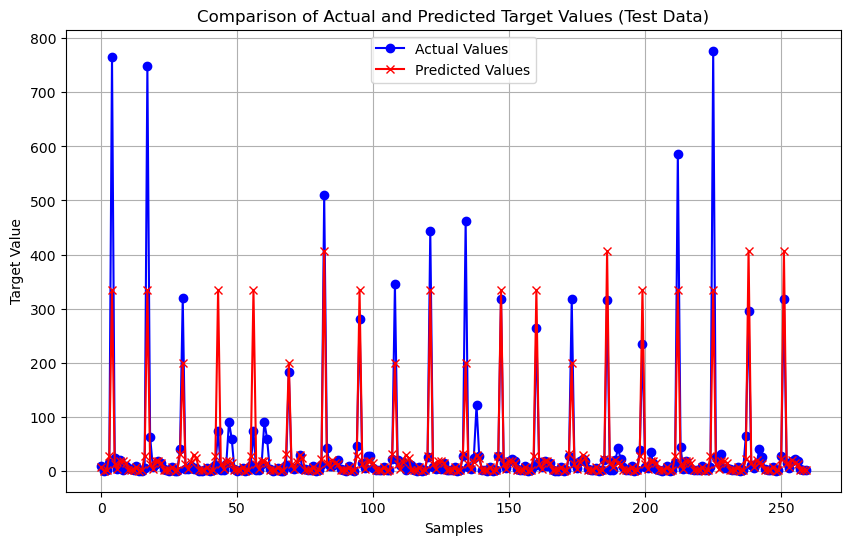

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_scaled and y_imputed are already defined and preprocessed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 60, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 12, 15, 20]
}

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with Decision Tree Regressor and cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=k_fold, scoring='r2')

# Perform grid search to find the best model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from GridSearchCV
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best R-squared (R2) score found:")
print(grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions using the best model
y_test_pred = best_dt_model.predict(X_test)

# Calculate evaluation metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Data Evaluation:")
print(f"Mean Squared Error: {test_mse}")
print(f"Mean Absolute Error: {test_mae}")
print(f"R2 Score: {test_r2}")

# Convert y_test and y_test_pred to 1D if they are not already
if len(y_test.shape) > 1:
    y_test = y_test.ravel()
if len(y_test_pred.shape) > 1:
    y_test_pred = y_test_pred.ravel()

# Plotting the actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(range(len(y_test)), y_test, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted Values', color='red', marker='x')

plt.title('Comparison of Actual and Predicted Target Values (Test Data)')
plt.xlabel('Samples')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
target_columns=y.columns

{'pH': 6.939666666666665, 'EC  (dS/m)': 0.16799999999999998, 'OC (%)': 0.5866666666666666, 'P   (kg/ha)': 28.06733333333333, 'K (kg/ha)': 334.5730000000001, 'Ca (meq/100g)': 12.674, 'Mg (meq/100g)': 3.800333333333333, 'S (ppm)': 18.729, 'Fe (ppm)': 17.187, 'Mn (ppm)': 15.114666666666665, 'Cu (ppm)': 2.293999999999999, 'Zn (ppm)': 1.1943333333333332, 'B (ppm)': 0.6383333333333333}


C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


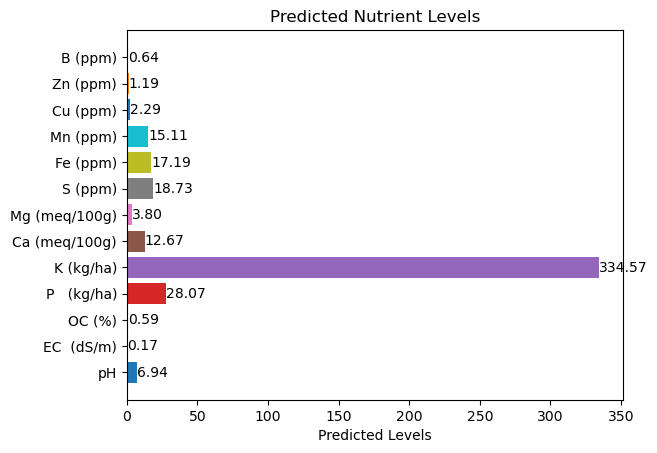

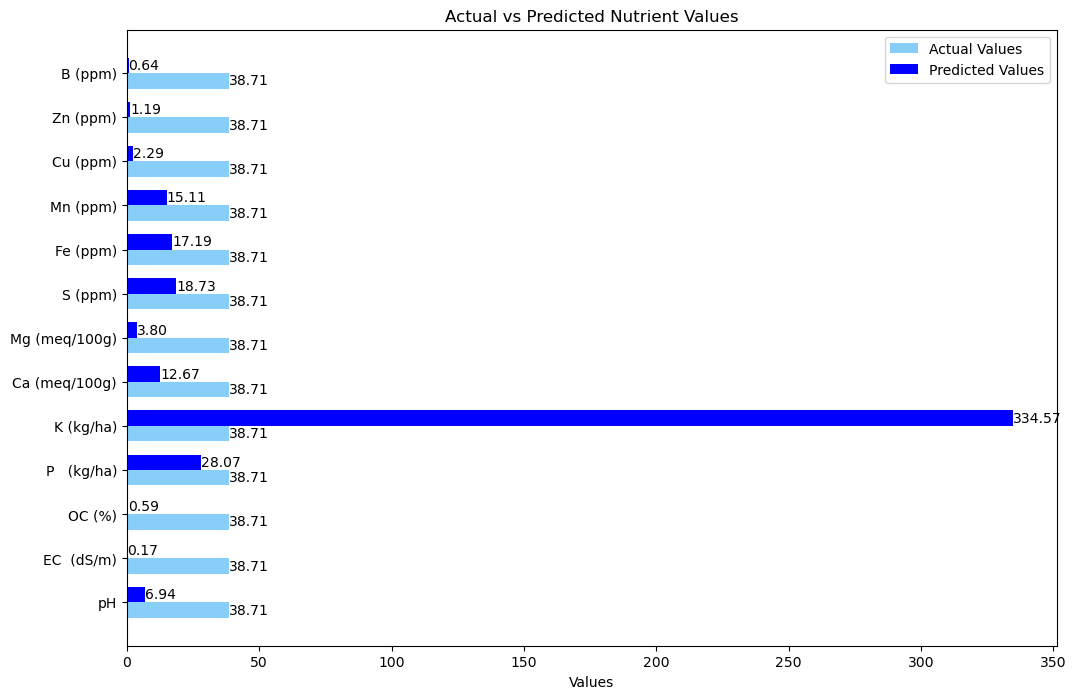

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data
data = {
    'A(410)': [1947.48],
    'B(435)': [992.41],
    'C(460)': [2051.13],
    'D(485)': [707.77],
    'E(510)': [822.51],
    'F(535)': [1371.58],
    'G(560)': [318.85],
    'H(585)': [315.68],
    'R(610)': [1305.33],
    'I(645)': [159.24],
    'S(680)': [329.5],
    'J(705)': [49.9],
    'U(760)': [75.75],
    'V(810)': [237.65],
    'W(860)': [305.23],
    'K(900)': [60.1],
    'L(940)': [36.52],
    'T(730)': [83.32]
}

# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df

df2 = preprocess_input_data(data)
scaled_input = scaler_X.transform(df2)
prediction = best_dt_model.predict(scaled_input)

# Predicted Nutrient Levels
predicted_values = {}
for i, col in enumerate(target_columns):
    predicted_values[col] = prediction[0][i]

print(predicted_values)

# Plotting bar graph to represent the predicted nutrient levels
colors = list(mcolors.TABLEAU_COLORS.values())
fig, ax = plt.subplots()
bars = ax.barh(list(predicted_values.keys()), list(predicted_values.values()), color=colors[:len(predicted_values)])
ax.set_xlabel('Predicted Levels')
ax.set_title('Predicted Nutrient Levels')

# Adding color to each bar and displaying the value
for bar, value in zip(bars, predicted_values.values()):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))


# Plot actual values
actual_bars = plt.barh(indices - bar_width / 2, y_test.mean(), bar_width, label='Actual Values', color='lightskyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width / 2, [predicted_values[col] for col in target_columns], bar_width, label='Predicted Values', color='blue')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()